# **Task 4 Statistical Modeling EDA**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.statistical_modelling import *

# Load Data

In [2]:
data = pd.read_csv('../data/cleaned_insurance_data.csv', low_memory=False, index_col=False)

In [3]:
models = Modelling(data)

# Specify the numeric and categorical features to use 

In [4]:
numeric_features = ['SumInsured', 'CalculatedPremiumPerTerm','RegistrationYear','PostalCode'] 
categorical_features = ['Province', 'CoverType', 'VehicleType', 'make', 'Gender', 'MaritalStatus','PostalCode','Model','CoverCategory','NewVehicle','RegistrationYear','Citizenship' ]
features = list(set(numeric_features) | set(categorical_features) - set(['TotalPremium', 'TotalClaims']))

# Encode categorical variables using label encoder

In [5]:
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [6]:
X = data[features]
y_premium = data['TotalPremium']
y_claims= data['TotalClaims']

# split the data
X_train, X_test, y_claims_train, y_claims_test=models.split_data(X,y_claims)
X_train, X_test, y_premium_train, y_premium_test=models.split_data(X,y_premium)

# Model Building - Train Linear Regression Model

In [7]:
model_claim = LinearRegression()
model_premium=LinearRegression()
model_claim.fit(X_train, y_claims_train) 
model_premium.fit(X_train, y_premium_train)

LinearRegression()

In [8]:
print ('Totalclaims Linear Regression result')
models.model_testing(model_claim, X_test, y_claims_test)
print('')
print('Total Premium Linear Regression Result')
models.model_testing(model_premium, X_test,y_premium_test)

Totalclaims Linear Regression result
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

Total Premium Linear Regression Result
Mean Absolute Error (MAE): 12.890839317342946
Mean Squared Error (MSE): 310.60410471296507
Root Mean Squared Error (RMSE): 17.623963933036322
R-squared: 0.35507014608973586


# Model Training for TotalClaims

In [9]:
Linear_Regression = LinearRegression()
Linear_Regression .fit(X_train, y_claims_train) 

Decision_Tree = DecisionTreeRegressor(random_state=42)
Decision_Tree.fit(X_train, y_claims_train)

Random_Forest =RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_claims_train)

XGBoost= XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_claims_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [10]:
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    XGBoost: "XGBoost"
}

for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"{model_names[model]} Model result for TotalClaims")
    
    # Perform model testing
    models.model_testing(model, X_test, y_claims_test)
    print()

Linear Regression Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

Decision Tree Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

Random Forest Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0

XGBoost Model result for TotalClaims
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
R-squared: 1.0



# Model Training for TotalPremium

In [11]:
Linear_Regression = LinearRegression()
Linear_Regression .fit(X_train, y_premium_train) 

Decision_Tree = DecisionTreeRegressor(random_state=42)
Decision_Tree.fit(X_train, y_premium_train)

Random_Forest =RandomForestRegressor(n_estimators=100, random_state=42)
Random_Forest.fit(X_train, y_premium_train)

XGBoost= XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_premium_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
model_names = {
    Linear_Regression: "Linear Regression",
    Decision_Tree: "Decision Tree",
    Random_Forest: "Random Forest",
    XGBoost: "XGBoost"
}

for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"{model_names[model]} Model result for Totalpremium")
    print('----------------------------------------------------')
    # Perform model testing
    models.model_testing(model, X_test, y_premium_test)
    print()

Linear Regression Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 12.890839317342946
Mean Squared Error (MSE): 310.60410471296507
Root Mean Squared Error (RMSE): 17.623963933036322
R-squared: 0.35507014608973586

Decision Tree Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 6.426261721815093
Mean Squared Error (MSE): 160.31090857115186
Root Mean Squared Error (RMSE): 12.661394416538482
R-squared: 0.6671348212202197

Random Forest Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 6.452311262681432
Mean Squared Error (MSE): 159.83648627417224
Root Mean Squared Error (RMSE): 12.642645540952742
R-squared: 0.6681198986806918

XGBoost Model result for Totalpremium
----------------------------------------------------
Mean Absolute Error (MAE): 10.025745691181111
Mean Squared Error (MSE): 227.55510446200972
Root 

# Scatter Plot for Each Model: Predicted vs. Actual Values

Plotting for Linear Regression


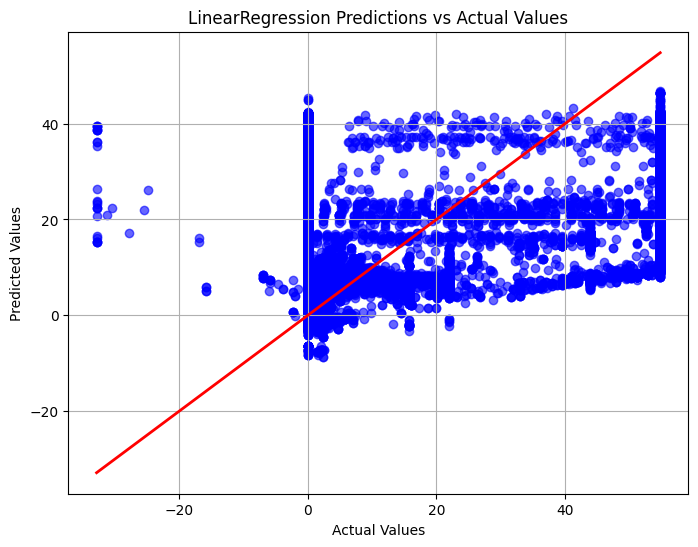


Plotting for Decision Tree


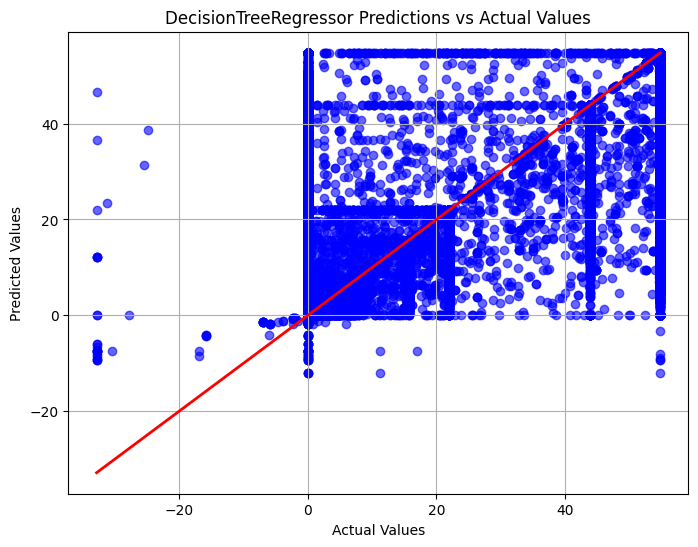


Plotting for Random Forest


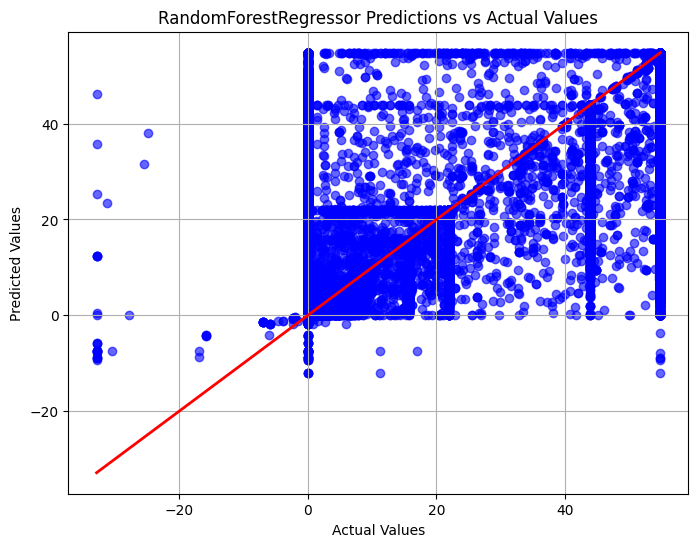


Plotting for XGBoost


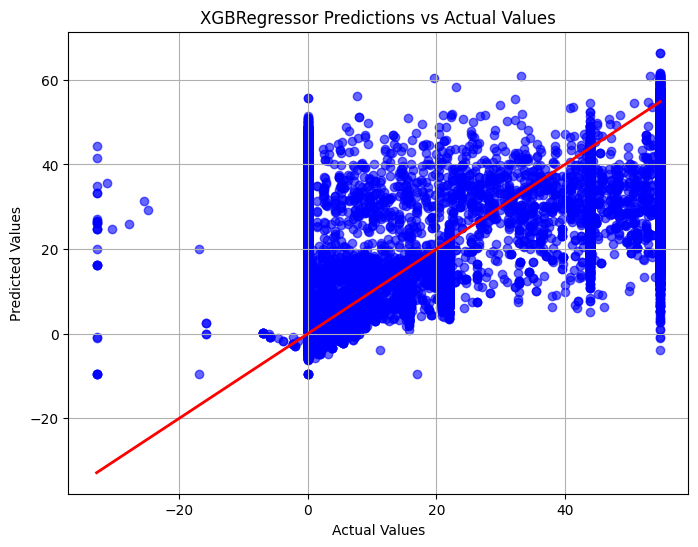

In [13]:
for model in [Linear_Regression, Decision_Tree, Random_Forest, XGBoost]:
    print(f"Plotting for {model_names[model]}")
    plot_predictions_vs_actuals(model, X_test, y_premium_test)
    print()

# Plot all models' predictions on a single scatter plot to visually compare their performance.

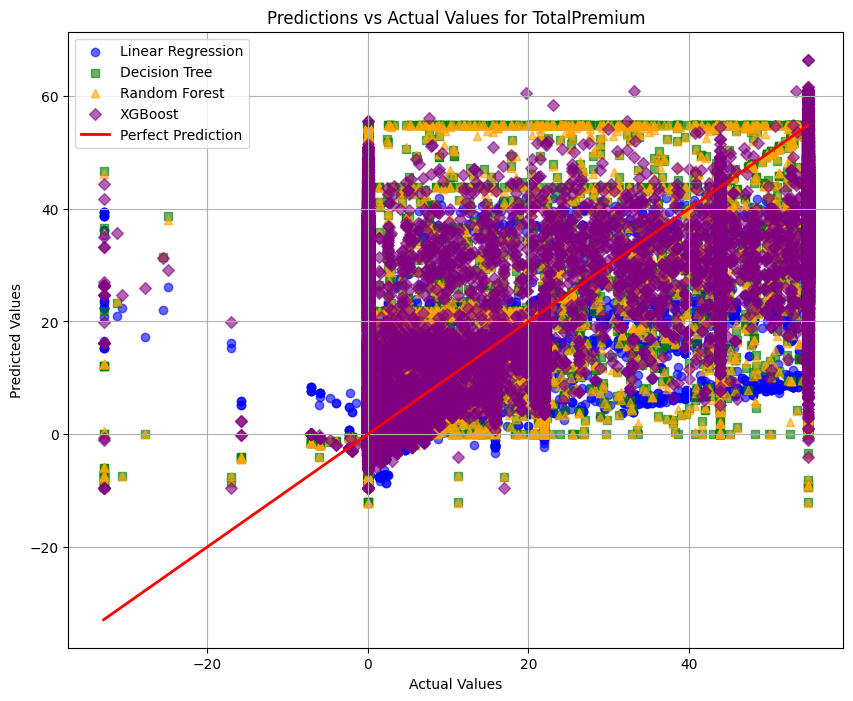

In [14]:
models_list = [
    (Linear_Regression, "Linear Regression"),
    (Decision_Tree, "Decision Tree"),
    (Random_Forest, "Random Forest"),
    (XGBoost, "XGBoost")
]

plot_all_models_predictions(models_list, X_test, y_premium_test, model_names)

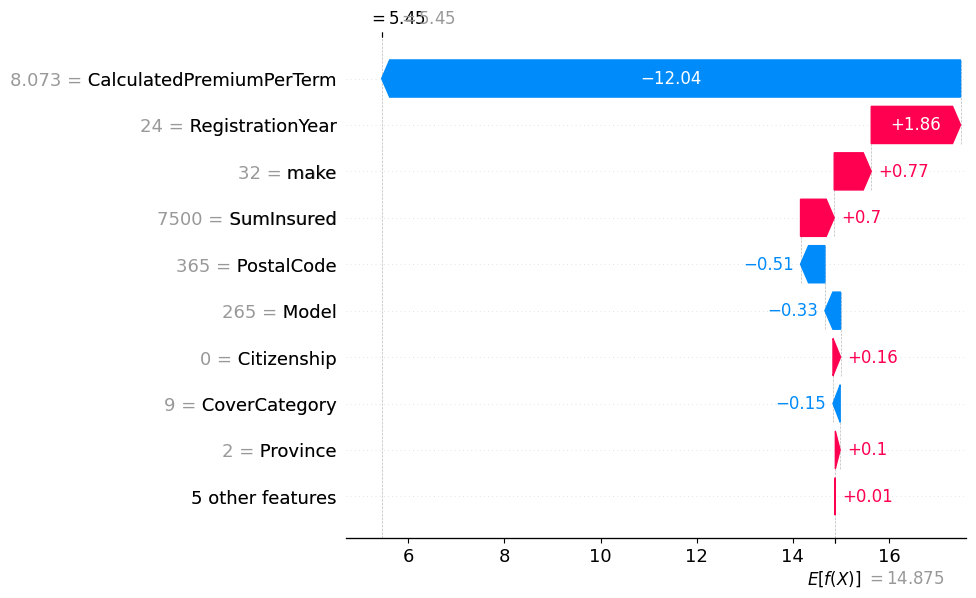

In [15]:
# Initialize SHAP explainer

explainer = shap.Explainer(XGBoost)
shap_values = explainer(X_test)
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

# Plot SHAP values

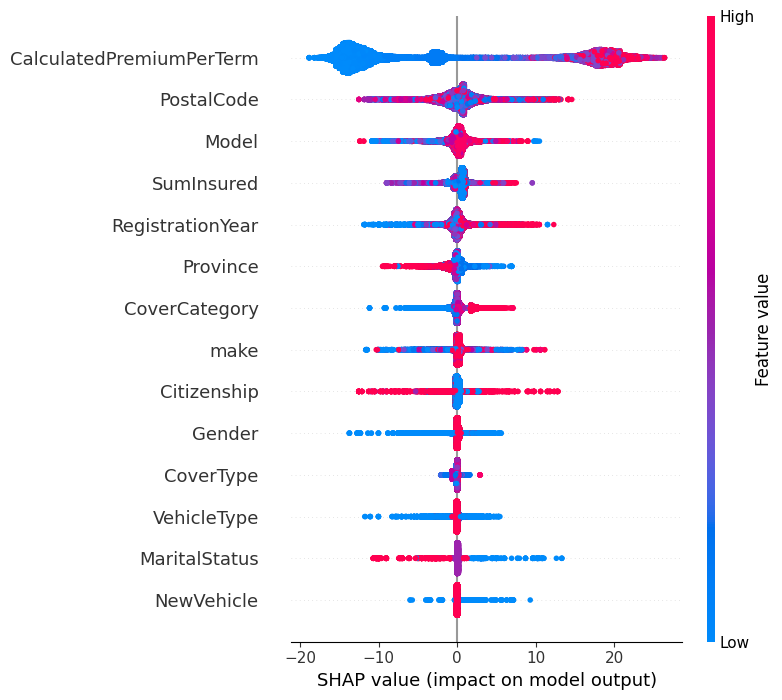

In [16]:
shap.summary_plot(shap_values, X_test)

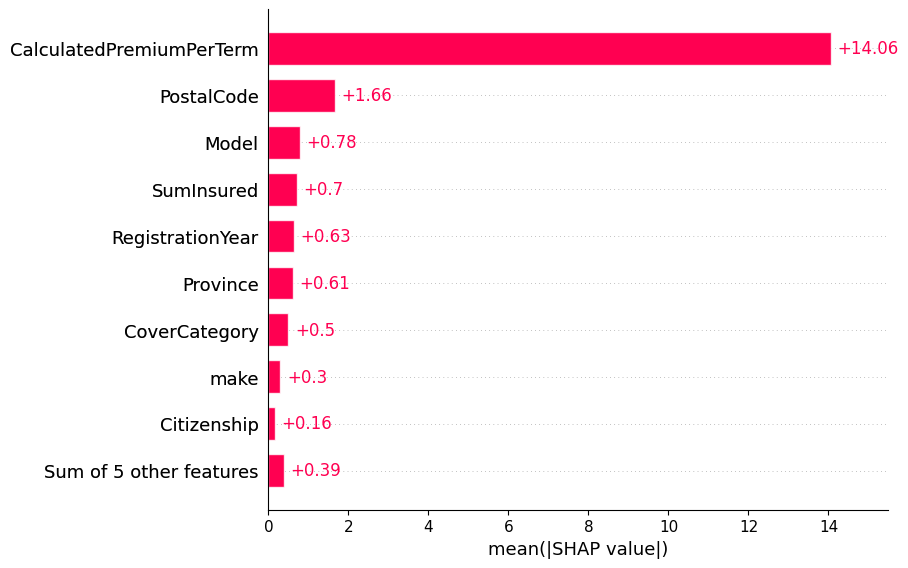

In [17]:
shap.plots.bar(shap_values)